In [26]:
from torch import nn, optim
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F
%matplotlib inline

In [27]:
with open('./PITdf.pkl','rb') as f:
    PITdf = pickle.load(f)
with open('./GREdf.pkl','rb') as f:
    GREdf = pickle.load(f)
with open('./JONdf.pkl','rb') as f:
    JONdf = pickle.load(f)
with open('./MGTdf.pkl','rb') as f:
    MGTdf = pickle.load(f)
with open('./WASdf.pkl','rb') as f:
    WASdf = pickle.load(f)
with open('./WHLdf.pkl','rb') as f:
    WHLdf = pickle.load(f)
with open('./PKSdf.pkl','rb') as f:
    PKSdf = pickle.load(f)
with open('./CBGdf.pkl','rb') as f:
    CBGdf = pickle.load(f)
with open('./STUdf.pkl','rb') as f:
    STUdf = pickle.load(f)
with open('./NPHdf.pkl','rb') as f:
    NPHdf = pickle.load(f)
with open('./ELVdf.pkl','rb') as f:
    ELVdf = pickle.load(f)
with open('./YGTdf.pkl','rb') as f:
    YGTdf = pickle.load(f)
with open('./NCSdf.pkl','rb') as f:
    NCSdf = pickle.load(f)
with open('./BUTdf.pkl','rb') as f:
    BUTdf = pickle.load(f)
with open('./KITdf.pkl','rb') as f:
    KITdf = pickle.load(f)

In [28]:
PITall_data = np.concatenate((PITdf['DNI'].values.reshape(-1,1), BUTdf['DNI'].values.reshape(-1,1), \
                           GREdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), NCSdf['DNI'].values.reshape(-1,1), \
                           KITdf['DNI'].values.reshape(-1,1), \
                           PITdf['day_x'].values.reshape(-1,1), PITdf['day_y'].values.reshape(-1,1), \
                           PITdf['time_x'].values.reshape(-1,1), PITdf['time_y'].values.reshape(-1,1)),axis = 1)


In [29]:
BUTall_data = np.concatenate((BUTdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           NCSdf['DNI'].values.reshape(-1,1), KITdf['DNI'].values.reshape(-1,1), \
                           YGTdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), GREdf['DNI'].values.reshape(-1,1), \
                           STUdf['DNI'].values.reshape(-1,1), \
                           BUTdf['day_x'].values.reshape(-1,1), BUTdf['day_y'].values.reshape(-1,1), \
                           BUTdf['time_x'].values.reshape(-1,1), BUTdf['time_y'].values.reshape(-1,1)),axis = 1)


In [30]:
WASall_data = np.concatenate((WASdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           GREdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           MGTdf['DNI'].values.reshape(-1,1), CBGdf['DNI'].values.reshape(-1,1), \
                           PKSdf['DNI'].values.reshape(-1,1), \
                           WASdf['day_x'].values.reshape(-1,1), WASdf['day_y'].values.reshape(-1,1), \
                           WASdf['time_x'].values.reshape(-1,1), WASdf['time_y'].values.reshape(-1,1)),axis = 1)


In [31]:
GREall_data = np.concatenate((GREdf['DNI'].values.reshape(-1,1), PITdf['DNI'].values.reshape(-1,1), \
                           WASdf['DNI'].values.reshape(-1,1), JONdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           BUTdf['DNI'].values.reshape(-1,1), KITdf['DNI'].values.reshape(-1,1), \
                           PKSdf['DNI'].values.reshape(-1,1), \
                           GREdf['day_x'].values.reshape(-1,1), GREdf['day_y'].values.reshape(-1,1), \
                           GREdf['time_x'].values.reshape(-1,1), GREdf['time_y'].values.reshape(-1,1)),axis = 1)


In [32]:
test_length = 365 * 48 * 1
train_length = 365 * 48 * 5
PITall_data = PITall_data[:(train_length + test_length), :]
BUTall_data = BUTall_data[:(train_length + test_length), :]
WASall_data = WASall_data[:(train_length + test_length), :]
GREall_data = GREall_data[:(train_length + test_length), :]



In [33]:
PITinputs = np.concatenate((PITall_data[3:-1,:], PITall_data[2:-2,:], PITall_data[1:-3,:], PITall_data[:-4,:]), axis = 1)
PITtargets = PITall_data[4:,0]

BUTinputs = np.concatenate((BUTall_data[3:-1,:], BUTall_data[2:-2,:], BUTall_data[1:-3,:], BUTall_data[:-4,:]), axis = 1)
BUTtargets = BUTall_data[4:,0]

WASinputs = np.concatenate((WASall_data[3:-1,:], WASall_data[2:-2,:], WASall_data[1:-3,:], WASall_data[:-4,:]), axis = 1)
WAStargets = WASall_data[4:,0]

GREinputs = np.concatenate((GREall_data[3:-1,:], GREall_data[2:-2,:], GREall_data[1:-3,:], GREall_data[:-4,:]), axis = 1)
GREtargets = GREall_data[4:,0]


In [34]:
PIT_X_train = PITinputs[:train_length,:]
PIT_y_train = PITtargets[:train_length]

PIT_X_test = PITinputs[train_length:,:]
PIT_y_test = PITtargets[train_length:]

BUT_X_train = BUTinputs[:train_length,:]
BUT_y_train = BUTtargets[:train_length]

BUT_X_test = BUTinputs[train_length:,:]
BUT_y_test = BUTtargets[train_length:]

WAS_X_train = WASinputs[:train_length,:]
WAS_y_train = WAStargets[:train_length]

WAS_X_test = WASinputs[train_length:,:]
WAS_y_test = WAStargets[train_length:]

GRE_X_train = GREinputs[:train_length,:]
GRE_y_train = GREtargets[:train_length]

GRE_X_test = GREinputs[train_length:,:]
GRE_y_test = GREtargets[train_length:]


In [35]:
PITscaler = MinMaxScaler()
BUTscaler = MinMaxScaler()
WASscaler = MinMaxScaler()
GREscaler = MinMaxScaler()

PIT_X_train_normalized = PITscaler.fit(PIT_X_train)
PIT_X_train_normalized = PITscaler.transform(PIT_X_train)
PIT_X_test_normalized = PITscaler.transform(PIT_X_test)

BUT_X_train_normalized = BUTscaler.fit(BUT_X_train)
BUT_X_train_normalized = BUTscaler.transform(BUT_X_train)
BUT_X_test_normalized = BUTscaler.transform(BUT_X_test)

WAS_X_train_normalized = WASscaler.fit(WAS_X_train)
WAS_X_train_normalized = WASscaler.transform(WAS_X_train)
WAS_X_test_normalized = WASscaler.transform(WAS_X_test)

GRE_X_train_normalized = GREscaler.fit(GRE_X_train)
GRE_X_train_normalized = GREscaler.transform(GRE_X_train)
GRE_X_test_normalized = GREscaler.transform(GRE_X_test)


In [36]:
PIT_X_train_normalized = torch.from_numpy(PIT_X_train_normalized).float()
PIT_y_train = torch.squeeze(torch.from_numpy(PIT_y_train).float())
PIT_X_test_normalized = torch.from_numpy(PIT_X_test_normalized).float()

BUT_X_train_normalized = torch.from_numpy(BUT_X_train_normalized).float()
BUT_y_train = torch.squeeze(torch.from_numpy(BUT_y_train).float())
BUT_X_test_normalized = torch.from_numpy(BUT_X_test_normalized).float()

WAS_X_train_normalized = torch.from_numpy(WAS_X_train_normalized).float()
WAS_y_train = torch.squeeze(torch.from_numpy(WAS_y_train).float())
WAS_X_test_normalized = torch.from_numpy(WAS_X_test_normalized).float()

GRE_X_train_normalized = torch.from_numpy(GRE_X_train_normalized).float()
GRE_y_train = torch.squeeze(torch.from_numpy(GRE_y_train).float())
GRE_X_test_normalized = torch.from_numpy(GRE_X_test_normalized).float()



In [37]:
class Net(torch.nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.relu(self.fc3(x))


In [38]:
PITnet = Net(PIT_X_train.shape[1])
BUTnet = Net(BUT_X_train.shape[1])
WASnet = Net(WAS_X_train.shape[1])
GREnet = Net(GRE_X_train.shape[1])


In [39]:
PITcriterion = nn.MSELoss()
PIToptimizer = optim.Adam(PITnet.parameters(), lr = 0.01)

BUTcriterion = nn.MSELoss()
BUToptimizer = optim.Adam(BUTnet.parameters(), lr = 0.01)

WAScriterion = nn.MSELoss()
WASoptimizer = optim.Adam(WASnet.parameters(), lr = 0.01)

GREcriterion = nn.MSELoss()
GREoptimizer = optim.Adam(GREnet.parameters(), lr = 0.01)

In [40]:
for epoch in range(1000):
    
    y_pred = PITnet(PIT_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = PITcriterion(y_pred, PIT_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    PIToptimizer.zero_grad()
    
    train_loss.backward()
    
    PIToptimizer.step()

tensor(117706.9609, grad_fn=<MseLossBackward>)
tensor(12213.7471, grad_fn=<MseLossBackward>)
tensor(10402.0742, grad_fn=<MseLossBackward>)
tensor(9914.8389, grad_fn=<MseLossBackward>)
tensor(9755.4229, grad_fn=<MseLossBackward>)
tensor(9578.6797, grad_fn=<MseLossBackward>)
tensor(9488.2373, grad_fn=<MseLossBackward>)
tensor(9406.5850, grad_fn=<MseLossBackward>)
tensor(9307.1416, grad_fn=<MseLossBackward>)
tensor(9235.2422, grad_fn=<MseLossBackward>)


In [41]:
for epoch in range(1000):
    
    y_pred = BUTnet(BUT_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = BUTcriterion(y_pred, BUT_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    BUToptimizer.zero_grad()
    
    train_loss.backward()
    
    BUToptimizer.step()

tensor(114615.9688, grad_fn=<MseLossBackward>)
tensor(12622.4180, grad_fn=<MseLossBackward>)
tensor(10892.5557, grad_fn=<MseLossBackward>)
tensor(10428.5820, grad_fn=<MseLossBackward>)
tensor(10007.9463, grad_fn=<MseLossBackward>)
tensor(9905.2100, grad_fn=<MseLossBackward>)
tensor(9815.6455, grad_fn=<MseLossBackward>)
tensor(9746.4902, grad_fn=<MseLossBackward>)
tensor(9699.0322, grad_fn=<MseLossBackward>)
tensor(9661.6670, grad_fn=<MseLossBackward>)


In [42]:
for epoch in range(1000):
    
    y_pred = WASnet(WAS_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = WAScriterion(y_pred, WAS_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    WASoptimizer.zero_grad()
    
    train_loss.backward()
    
    WASoptimizer.step()

tensor(118882.7031, grad_fn=<MseLossBackward>)
tensor(12157.5391, grad_fn=<MseLossBackward>)
tensor(10456.2305, grad_fn=<MseLossBackward>)
tensor(10080.0156, grad_fn=<MseLossBackward>)
tensor(9990.0264, grad_fn=<MseLossBackward>)
tensor(9932.7812, grad_fn=<MseLossBackward>)
tensor(9464.9814, grad_fn=<MseLossBackward>)
tensor(9369.1670, grad_fn=<MseLossBackward>)
tensor(9325.2822, grad_fn=<MseLossBackward>)
tensor(9281.0039, grad_fn=<MseLossBackward>)


In [43]:
for epoch in range(1000):
    
    y_pred = GREnet(GRE_X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = GREcriterion(y_pred, GRE_y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    GREoptimizer.zero_grad()
    
    train_loss.backward()
    
    GREoptimizer.step()

tensor(118936.2812, grad_fn=<MseLossBackward>)
tensor(13156.0146, grad_fn=<MseLossBackward>)
tensor(10827.9893, grad_fn=<MseLossBackward>)
tensor(10430.9277, grad_fn=<MseLossBackward>)
tensor(10226.3525, grad_fn=<MseLossBackward>)
tensor(10103.1621, grad_fn=<MseLossBackward>)
tensor(9980.3613, grad_fn=<MseLossBackward>)
tensor(9876.8457, grad_fn=<MseLossBackward>)
tensor(9782.5576, grad_fn=<MseLossBackward>)
tensor(9731.7031, grad_fn=<MseLossBackward>)


In [44]:
PIT_y_test_pred = PITnet(PIT_X_test_normalized)
PIT_y_test_pred_np = PIT_y_test_pred.detach().numpy()[:,0]

BUT_y_test_pred = BUTnet(BUT_X_test_normalized)
BUT_y_test_pred_np = BUT_y_test_pred.detach().numpy()[:,0]

WAS_y_test_pred = WASnet(WAS_X_test_normalized)
WAS_y_test_pred_np = WAS_y_test_pred.detach().numpy()[:,0]

GRE_y_test_pred = GREnet(GRE_X_test_normalized)
GRE_y_test_pred_np = GRE_y_test_pred.detach().numpy()[:,0]

PIT Avg error: -1.641454982945832
PIT Avg absolute error: 41.89604085366633
PIT Err Std: 94.82811123680156
PIT Abs Err Std: 85.08693681164088
PIT min err: -757.2292442321777
PIT max err: 831.9385375976562


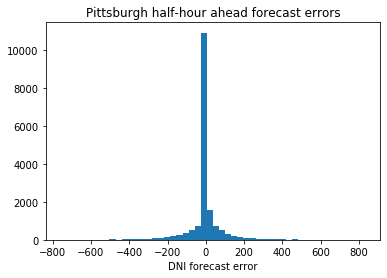

In [95]:
PITerr = np.subtract(PIT_y_test_pred_np, PIT_y_test)
plt.hist(PITerr, bins = 50)
plt.title('Pittsburgh half-hour ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(PITerr)
abserr = np.abs(PITerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(PITerr)
min_err = np.min(PITerr)
max_err = np.max(PITerr)

print('PIT Avg error: ' + str(mean_err))
print('PIT Avg absolute error: ' + str(mean_abs_err))
print('PIT Err Std: ' + str(std_err))
print('PIT Abs Err Std: ' + str(std_abs_err))
print('PIT min err: ' + str(min_err))
print('PIT max err: ' + str(max_err))

BUT Avg error: 1.8734911854210223
BUT Avg absolute error: 42.58436462259485
BUT Err Std: 95.23110409341538
BUT Abs Err Std: 85.20002961127805
BUT min err: -815.3445816040039
BUT max err: 785.8848266601562


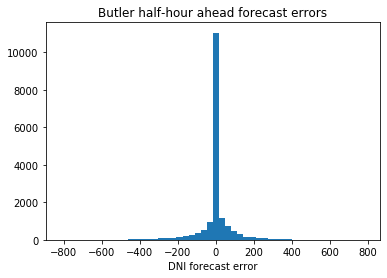

In [96]:
BUTerr = np.subtract(BUT_y_test_pred_np, BUT_y_test)
plt.hist(BUTerr, bins = 50)
plt.title('Butler half-hour ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(BUTerr)
abserr = np.abs(BUTerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(BUTerr)
min_err = np.min(BUTerr)
max_err = np.max(BUTerr)

print('BUT Avg error: ' + str(mean_err))
print('BUT Avg absolute error: ' + str(mean_abs_err))
print('BUT Err Std: ' + str(std_err))
print('BUT Abs Err Std: ' + str(std_abs_err))
print('BUT min err: ' + str(min_err))
print('BUT max err: ' + str(max_err))

WAS Avg error: 2.5465529019433726
WAS Avg absolute error: 42.06853203326855
WAS Err Std: 93.01831903899964
WAS Abs Err Std: 83.000790484726
WAS min err: -712.697998046875
WAS max err: 756.4727783203125


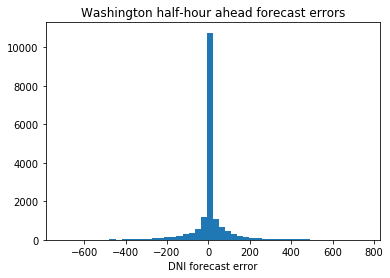

In [97]:
WASerr = np.subtract(WAS_y_test_pred_np, WAS_y_test)
plt.hist(WASerr, bins = 50)
plt.title('Washington half-hour ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(WASerr)
abserr = np.abs(WASerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(WASerr)
min_err = np.min(WASerr)
max_err = np.max(WASerr)
print('WAS Avg error: ' + str(mean_err))
print('WAS Avg absolute error: ' + str(mean_abs_err))
print('WAS Err Std: ' + str(std_err))
print('WAS Abs Err Std: ' + str(std_abs_err))
print('WAS min err: ' + str(min_err))
print('WAS max err: ' + str(max_err))

GRE Avg error: 0.34822414303166555
GRE Avg absolute error: 44.85807970733762
GRE Err Std: 99.11083940241562
GRE Abs Err Std: 88.37891395618841
GRE min err: -791.35498046875
GRE max err: 744.0205078125


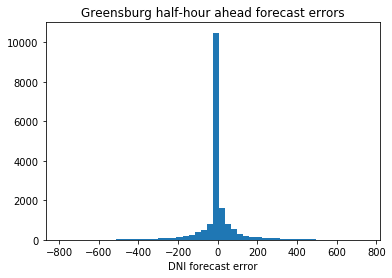

In [98]:
GREerr = np.subtract(GRE_y_test_pred_np, GRE_y_test)
plt.hist(GREerr, bins = 50)
plt.title('Greensburg half-hour ahead forecast errors')
plt.xlabel('DNI forecast error')
mean_err = np.mean(GREerr)
abserr = np.abs(GREerr)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(GREerr)
min_err = np.min(GREerr)
max_err = np.max(GREerr)
print('GRE Avg error: ' + str(mean_err))
print('GRE Avg absolute error: ' + str(mean_abs_err))
print('GRE Err Std: ' + str(std_err))
print('GRE Abs Err Std: ' + str(std_abs_err))
print('GRE min err: ' + str(min_err))
print('GRE max err: ' + str(max_err))

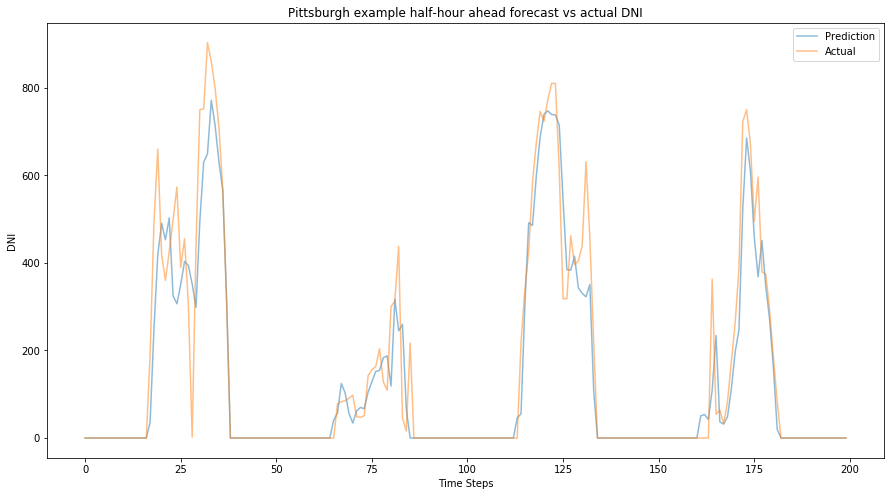

In [103]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(PIT_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(PIT_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Pittsburgh example half-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

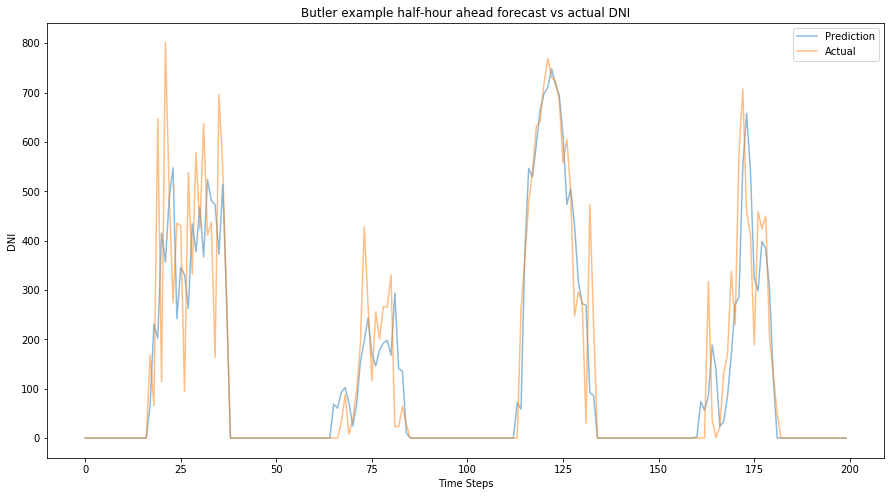

In [104]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(BUT_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(BUT_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Butler example half-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

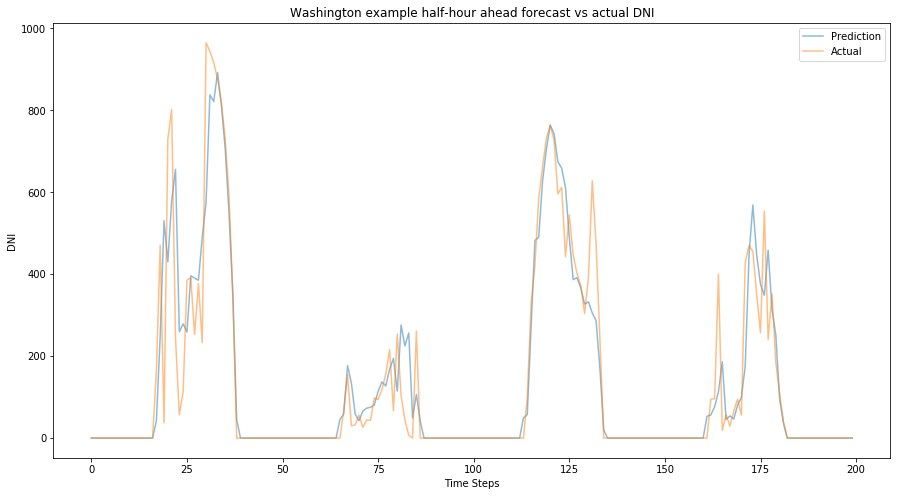

In [105]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(WAS_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(WAS_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Washington example half-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

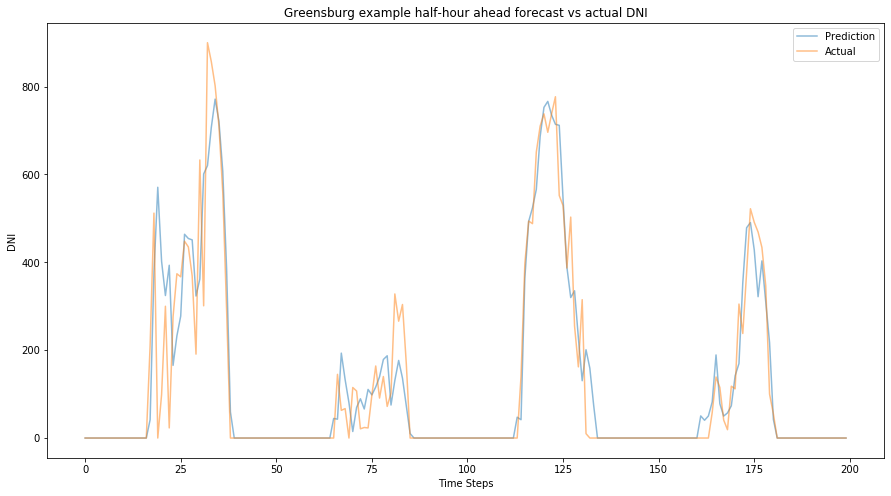

In [106]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(GRE_y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(GRE_y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.title('Greensburg example half-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()

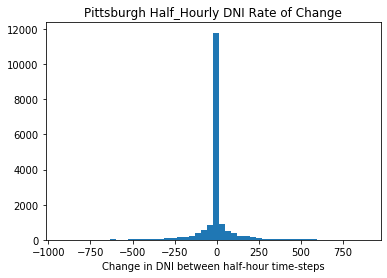

PIT Avg half_hour_ROC: 0.0
PIT Avg absolute half_hour_ROC: 49.11435912075364
PIT Half_hour_ROC Std: 119.2235945051384
PIT Abs half_hour_ROC Std: 108.63721836867559
PIT Min half_hour_ROC: -926.0
PIT Max half_hour_ROC: 885.0


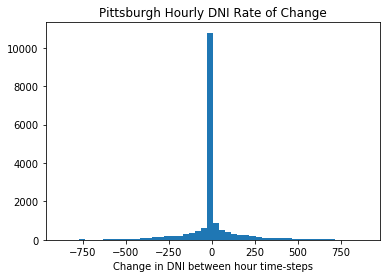

Avg hour_ROC: 0.0
Avg absolute hour_ROC: 72.59860682882265
Hour_ROC Std: 155.20239303029308
Abs Hour_ROC Std: 137.1758910626922
PIT Min hour_ROC: -877.0
PIT Max hour_ROC: 892.0


In [94]:
PIT_half_hour_ROC = PIT_y_test[1:] - PIT_y_test[:-1]
PIT_hour_ROC = PIT_y_test[2:] - PIT_y_test[:-2]
plt.hist(PIT_half_hour_ROC, bins = 50)
plt.title('Pittsburgh Half_Hourly DNI Rate of Change')
plt.xlabel('Change in DNI between half-hour time-steps')
plt.show()
mean_half_hour_ROC = np.mean(PIT_half_hour_ROC)
abs_half_hour_ROC = np.abs(PIT_half_hour_ROC)
mean_abs_half_hour_ROC = np.mean(abs_half_hour_ROC)
std_abs_half_hour_ROC = np.std(abs_half_hour_ROC)
std_half_hour_ROC = np.std(PIT_half_hour_ROC)
min_half_hour_ROC = np.min(PIT_half_hour_ROC)
max_half_hour_ROC = np.max(PIT_half_hour_ROC)
print('PIT Avg half_hour_ROC: ' + str(mean_half_hour_ROC))
print('PIT Avg absolute half_hour_ROC: ' + str(mean_abs_half_hour_ROC))
print('PIT Half_hour_ROC Std: ' + str(std_half_hour_ROC))
print('PIT Abs half_hour_ROC Std: ' + str(std_abs_half_hour_ROC))
print('PIT Min half_hour_ROC: ' + str(min_half_hour_ROC))
print('PIT Max half_hour_ROC: ' + str(max_half_hour_ROC))

plt.hist(PIT_hour_ROC, bins = 50)
plt.title('Pittsburgh Hourly DNI Rate of Change')
plt.xlabel('Change in DNI between hour time-steps')
plt.show()
mean_hour_ROC = np.mean(PIT_hour_ROC)
abs_hour_ROC = np.abs(PIT_hour_ROC)
mean_abs_hour_ROC = np.mean(abs_hour_ROC)
std_abs_hour_ROC = np.std(abs_hour_ROC)
std_hour_ROC = np.std(PIT_hour_ROC)
min_hour_ROC = np.min(PIT_hour_ROC)
max_hour_ROC = np.max(PIT_hour_ROC)
print('Avg hour_ROC: ' + str(mean_hour_ROC))
print('Avg absolute hour_ROC: ' + str(mean_abs_hour_ROC))
print('Hour_ROC Std: ' + str(std_hour_ROC))
print('Abs Hour_ROC Std: ' + str(std_abs_hour_ROC))
print('PIT Min hour_ROC: ' + str(min_hour_ROC))
print('PIT Max hour_ROC: ' + str(max_hour_ROC))

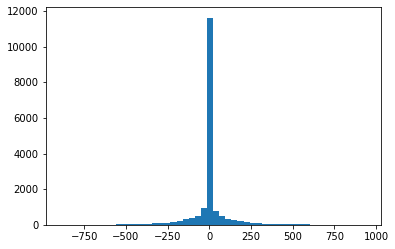

BUT Avg half_hour_ROC: 0.0
BUT Avg absolute half_hour_ROC: 51.20399657436483
BUT Half_hour_ROC Std: 121.06647798830257
BUT Abs half_hour_ROC Std: 109.70525432860809
BUT Min half_hour_ROC: -890.0
BUT Max half_hour_ROC: 936.0


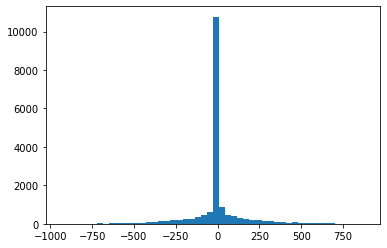

BUT Avg hour_ROC: 0.0
BUT Avg absolute hour_ROC: 73.35503026150508
BUT Hour_ROC Std: 155.57739194031626
BUT Abs Hour_ROC Std: 137.1982668195355
BUT Min hour_ROC: -937.0
BUT Max hour_ROC: 882.0


In [84]:
BUT_half_hour_ROC = BUT_y_test[1:] - BUT_y_test[:-1]
BUT_hour_ROC = BUT_y_test[2:] - BUT_y_test[:-2]
plt.hist(BUT_half_hour_ROC, bins = 50)
plt.show()
mean_half_hour_ROC = np.mean(BUT_half_hour_ROC)
abs_half_hour_ROC = np.abs(BUT_half_hour_ROC)
mean_abs_half_hour_ROC = np.mean(abs_half_hour_ROC)
std_abs_half_hour_ROC = np.std(abs_half_hour_ROC)
std_half_hour_ROC = np.std(BUT_half_hour_ROC)
min_half_hour_ROC = np.min(BUT_half_hour_ROC)
max_half_hour_ROC = np.max(BUT_half_hour_ROC)
print('BUT Avg half_hour_ROC: ' + str(mean_half_hour_ROC))
print('BUT Avg absolute half_hour_ROC: ' + str(mean_abs_half_hour_ROC))
print('BUT Half_hour_ROC Std: ' + str(std_half_hour_ROC))
print('BUT Abs half_hour_ROC Std: ' + str(std_abs_half_hour_ROC))
print('BUT Min half_hour_ROC: ' + str(min_half_hour_ROC))
print('BUT Max half_hour_ROC: ' + str(max_half_hour_ROC))

plt.hist(BUT_hour_ROC, bins = 50)
plt.show()
mean_hour_ROC = np.mean(BUT_hour_ROC)
abs_hour_ROC = np.abs(BUT_hour_ROC)
mean_abs_hour_ROC = np.mean(abs_hour_ROC)
std_abs_hour_ROC = np.std(abs_hour_ROC)
std_hour_ROC = np.std(BUT_hour_ROC)
min_hour_ROC = np.min(BUT_hour_ROC)
max_hour_ROC = np.max(BUT_hour_ROC)
print('BUT Avg hour_ROC: ' + str(mean_hour_ROC))
print('BUT Avg absolute hour_ROC: ' + str(mean_abs_hour_ROC))
print('BUT Hour_ROC Std: ' + str(std_hour_ROC))
print('BUT Abs Hour_ROC Std: ' + str(std_abs_hour_ROC))
print('BUT Min hour_ROC: ' + str(min_hour_ROC))
print('BUT Max hour_ROC: ' + str(max_hour_ROC))

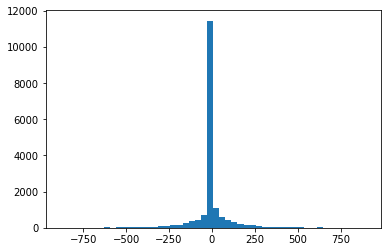

WAS Avg half_hour_ROC: 0.0
WAS Avg absolute half_hour_ROC: 50.58190122751927
WAS Half_hour_ROC Std: 119.79531406073716
WAS Abs half_hour_ROC Std: 108.59276467205416
WAS Min half_hour_ROC: -879.0
WAS Max half_hour_ROC: 892.0


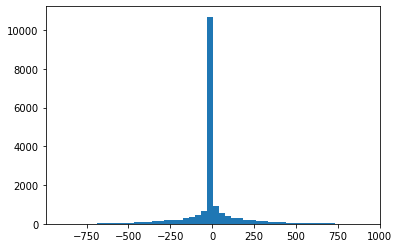

WAS Avg hour_ROC: 0.0
WAS Avg absolute hour_ROC: 72.3025008564577
WAS Hour_ROC Std: 153.9360371342776
WAS Abs Hour_ROC Std: 135.8994183155602
WAS Min hour_ROC: -904.0
WAS Max hour_ROC: 914.0


In [85]:
WAS_half_hour_ROC = WAS_y_test[1:] - WAS_y_test[:-1]
WAS_hour_ROC = WAS_y_test[2:] - WAS_y_test[:-2]
plt.hist(WAS_half_hour_ROC, bins = 50)
plt.show()
mean_half_hour_ROC = np.mean(WAS_half_hour_ROC)
abs_half_hour_ROC = np.abs(WAS_half_hour_ROC)
mean_abs_half_hour_ROC = np.mean(abs_half_hour_ROC)
std_abs_half_hour_ROC = np.std(abs_half_hour_ROC)
std_half_hour_ROC = np.std(WAS_half_hour_ROC)
min_half_hour_ROC = np.min(WAS_half_hour_ROC)
max_half_hour_ROC = np.max(WAS_half_hour_ROC)
print('WAS Avg half_hour_ROC: ' + str(mean_half_hour_ROC))
print('WAS Avg absolute half_hour_ROC: ' + str(mean_abs_half_hour_ROC))
print('WAS Half_hour_ROC Std: ' + str(std_half_hour_ROC))
print('WAS Abs half_hour_ROC Std: ' + str(std_abs_half_hour_ROC))
print('WAS Min half_hour_ROC: ' + str(min_half_hour_ROC))
print('WAS Max half_hour_ROC: ' + str(max_half_hour_ROC))

plt.hist(WAS_hour_ROC, bins = 50)
plt.show()
mean_hour_ROC = np.mean(WAS_hour_ROC)
abs_hour_ROC = np.abs(WAS_hour_ROC)
mean_abs_hour_ROC = np.mean(abs_hour_ROC)
std_abs_hour_ROC = np.std(abs_hour_ROC)
std_hour_ROC = np.std(WAS_hour_ROC)
min_hour_ROC = np.min(WAS_hour_ROC)
max_hour_ROC = np.max(WAS_hour_ROC)
print('WAS Avg hour_ROC: ' + str(mean_hour_ROC))
print('WAS Avg absolute hour_ROC: ' + str(mean_abs_hour_ROC))
print('WAS Hour_ROC Std: ' + str(std_hour_ROC))
print('WAS Abs Hour_ROC Std: ' + str(std_abs_hour_ROC))
print('WAS Min hour_ROC: ' + str(min_hour_ROC))
print('WAS Max hour_ROC: ' + str(max_hour_ROC))

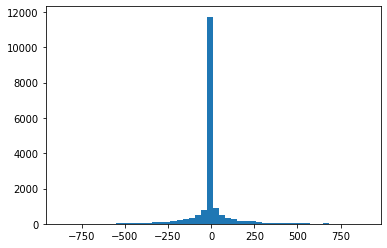

GRE Avg half_hour_ROC: 0.0
GRE Avg absolute half_hour_ROC: 50.65977733371396
GRE Half_hour_ROC Std: 122.2785310936829
GRE Abs half_hour_ROC Std: 111.29072794679392
GRE Min half_hour_ROC: -870.0
GRE Max half_hour_ROC: 893.0


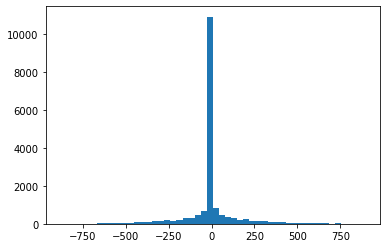

GRE Avg hour_ROC: 0.0
GRE Avg absolute hour_ROC: 71.63549160671462
GRE Hour_ROC Std: 155.42644868998633
GRE Abs Hour_ROC Std: 137.93381490644444
GRE Min hour_ROC: -878.0
GRE Max hour_ROC: 895.0


In [86]:
GRE_half_hour_ROC = GRE_y_test[1:] - GRE_y_test[:-1]
GRE_hour_ROC = GRE_y_test[2:] - GRE_y_test[:-2]
plt.hist(GRE_half_hour_ROC, bins = 50)
plt.show()
mean_half_hour_ROC = np.mean(GRE_half_hour_ROC)
abs_half_hour_ROC = np.abs(GRE_half_hour_ROC)
mean_abs_half_hour_ROC = np.mean(abs_half_hour_ROC)
std_abs_half_hour_ROC = np.std(abs_half_hour_ROC)
std_half_hour_ROC = np.std(GRE_half_hour_ROC)
min_half_hour_ROC = np.min(GRE_half_hour_ROC)
max_half_hour_ROC = np.max(GRE_half_hour_ROC)
print('GRE Avg half_hour_ROC: ' + str(mean_half_hour_ROC))
print('GRE Avg absolute half_hour_ROC: ' + str(mean_abs_half_hour_ROC))
print('GRE Half_hour_ROC Std: ' + str(std_half_hour_ROC))
print('GRE Abs half_hour_ROC Std: ' + str(std_abs_half_hour_ROC))
print('GRE Min half_hour_ROC: ' + str(min_half_hour_ROC))
print('GRE Max half_hour_ROC: ' + str(max_half_hour_ROC))

plt.hist(GRE_hour_ROC, bins = 50)
plt.show()
mean_hour_ROC = np.mean(GRE_hour_ROC)
abs_hour_ROC = np.abs(GRE_hour_ROC)
mean_abs_hour_ROC = np.mean(abs_hour_ROC)
std_abs_hour_ROC = np.std(abs_hour_ROC)
std_hour_ROC = np.std(GRE_hour_ROC)
min_hour_ROC = np.min(GRE_hour_ROC)
max_hour_ROC = np.max(GRE_hour_ROC)
print('GRE Avg hour_ROC: ' + str(mean_hour_ROC))
print('GRE Avg absolute hour_ROC: ' + str(mean_abs_hour_ROC))
print('GRE Hour_ROC Std: ' + str(std_hour_ROC))
print('GRE Abs Hour_ROC Std: ' + str(std_abs_hour_ROC))
print('GRE Min hour_ROC: ' + str(min_hour_ROC))
print('GRE Max hour_ROC: ' + str(max_hour_ROC))

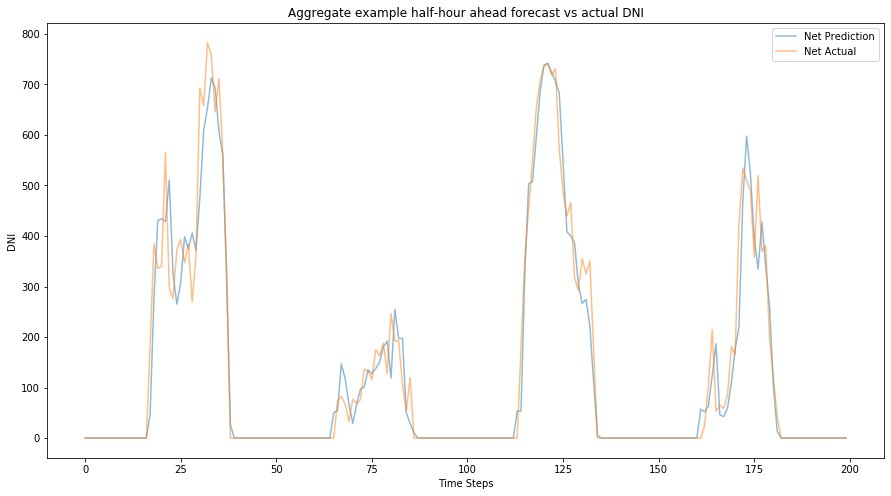

In [107]:
net_prediction = (0.25 * PIT_y_test_pred_np) + (0.25 * BUT_y_test_pred_np) + (0.25 * WAS_y_test_pred_np) + (0.25 * GRE_y_test_pred_np)
net_actual = (0.25 * PIT_y_test) + (0.25 * BUT_y_test) + (0.25 * WAS_y_test) + (0.25 * GRE_y_test)
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(net_prediction[start:(start+window)],alpha = 0.5)
plt.plot(net_actual[start:(start+window)], alpha = 0.5)
plt.legend(['Net Prediction', 'Net Actual'])
plt.title('Aggregate example half-hour ahead forecast vs actual DNI')
plt.xlabel('Time Steps')
plt.ylabel('DNI')
plt.show()



NET Avg error: 0.7817034811629219
NET Avg absolute error: 26.40169077570869
NET Err Std: 55.65496726049277
NET Abs Err Std: 49.00037923611247
NET min err: -653.6077880859375
NET max err: 583.6928100585938


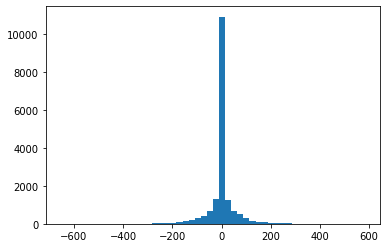

In [92]:
net_err = np.subtract(net_prediction, net_actual)
plt.hist(net_err, bins = 50)
mean_err = np.mean(net_err)
abserr = np.abs(net_err)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(net_err)
min_err = np.min(net_err)
max_err = np.max(net_err)
print('NET Avg error: ' + str(mean_err))
print('NET Avg absolute error: ' + str(mean_abs_err))
print('NET Err Std: ' + str(std_err))
print('NET Abs Err Std: ' + str(std_abs_err))
print('NET min err: ' + str(min_err))
print('NET max err: ' + str(max_err))


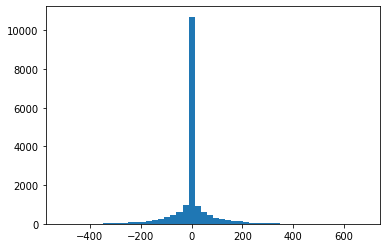

NET Avg half_hour_ROC: 0.0
NET Avg absolute half_hour_ROC: 35.97131030545247
NET Half_hour_ROC Std: 74.28172271256534
NET Abs half_hour_ROC Std: 64.99106987929414
NET Min half_hour_ROC: -514.5
NET Max half_hour_ROC: 683.0


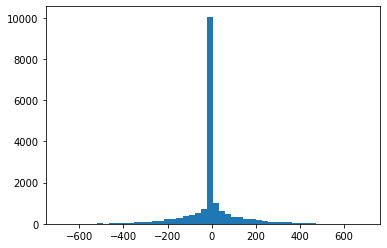

NET Avg hour_ROC: 0.0
NET Avg absolute hour_ROC: 55.8017014959461
NET Hour_ROC Std: 111.44476284757751
NET Abs Hour_ROC Std: 96.46815679958915
NET Min hour_ROC: -683.75
NET Max hour_ROC: 695.25


In [93]:
half_hour_ROC = net_actual[1:] - net_actual[:-1]
hour_ROC = net_actual[2:] - net_actual[:-2]
plt.hist(half_hour_ROC, bins = 50)
plt.show()
mean_half_hour_ROC = np.mean(half_hour_ROC)
abs_half_hour_ROC = np.abs(half_hour_ROC)
mean_abs_half_hour_ROC = np.mean(abs_half_hour_ROC)
std_abs_half_hour_ROC = np.std(abs_half_hour_ROC)
std_half_hour_ROC = np.std(half_hour_ROC)
min_half_hour_ROC = np.min(half_hour_ROC)
max_half_hour_ROC = np.max(half_hour_ROC)
print('NET Avg half_hour_ROC: ' + str(mean_half_hour_ROC))
print('NET Avg absolute half_hour_ROC: ' + str(mean_abs_half_hour_ROC))
print('NET Half_hour_ROC Std: ' + str(std_half_hour_ROC))
print('NET Abs half_hour_ROC Std: ' + str(std_abs_half_hour_ROC))
print('NET Min half_hour_ROC: ' + str(min_half_hour_ROC))
print('NET Max half_hour_ROC: ' + str(max_half_hour_ROC))

plt.hist(hour_ROC, bins = 50)
plt.show()
mean_hour_ROC = np.mean(hour_ROC)
abs_hour_ROC = np.abs(hour_ROC)
mean_abs_hour_ROC = np.mean(abs_hour_ROC)
std_abs_hour_ROC = np.std(abs_hour_ROC)
std_hour_ROC = np.std(hour_ROC)
min_hour_ROC = np.min(hour_ROC)
max_hour_ROC = np.max(hour_ROC)
print('NET Avg hour_ROC: ' + str(mean_hour_ROC))
print('NET Avg absolute hour_ROC: ' + str(mean_abs_hour_ROC))
print('NET Hour_ROC Std: ' + str(std_hour_ROC))
print('NET Abs Hour_ROC Std: ' + str(std_abs_hour_ROC))
print('NET Min hour_ROC: ' + str(min_hour_ROC))
print('NET Max hour_ROC: ' + str(max_hour_ROC))